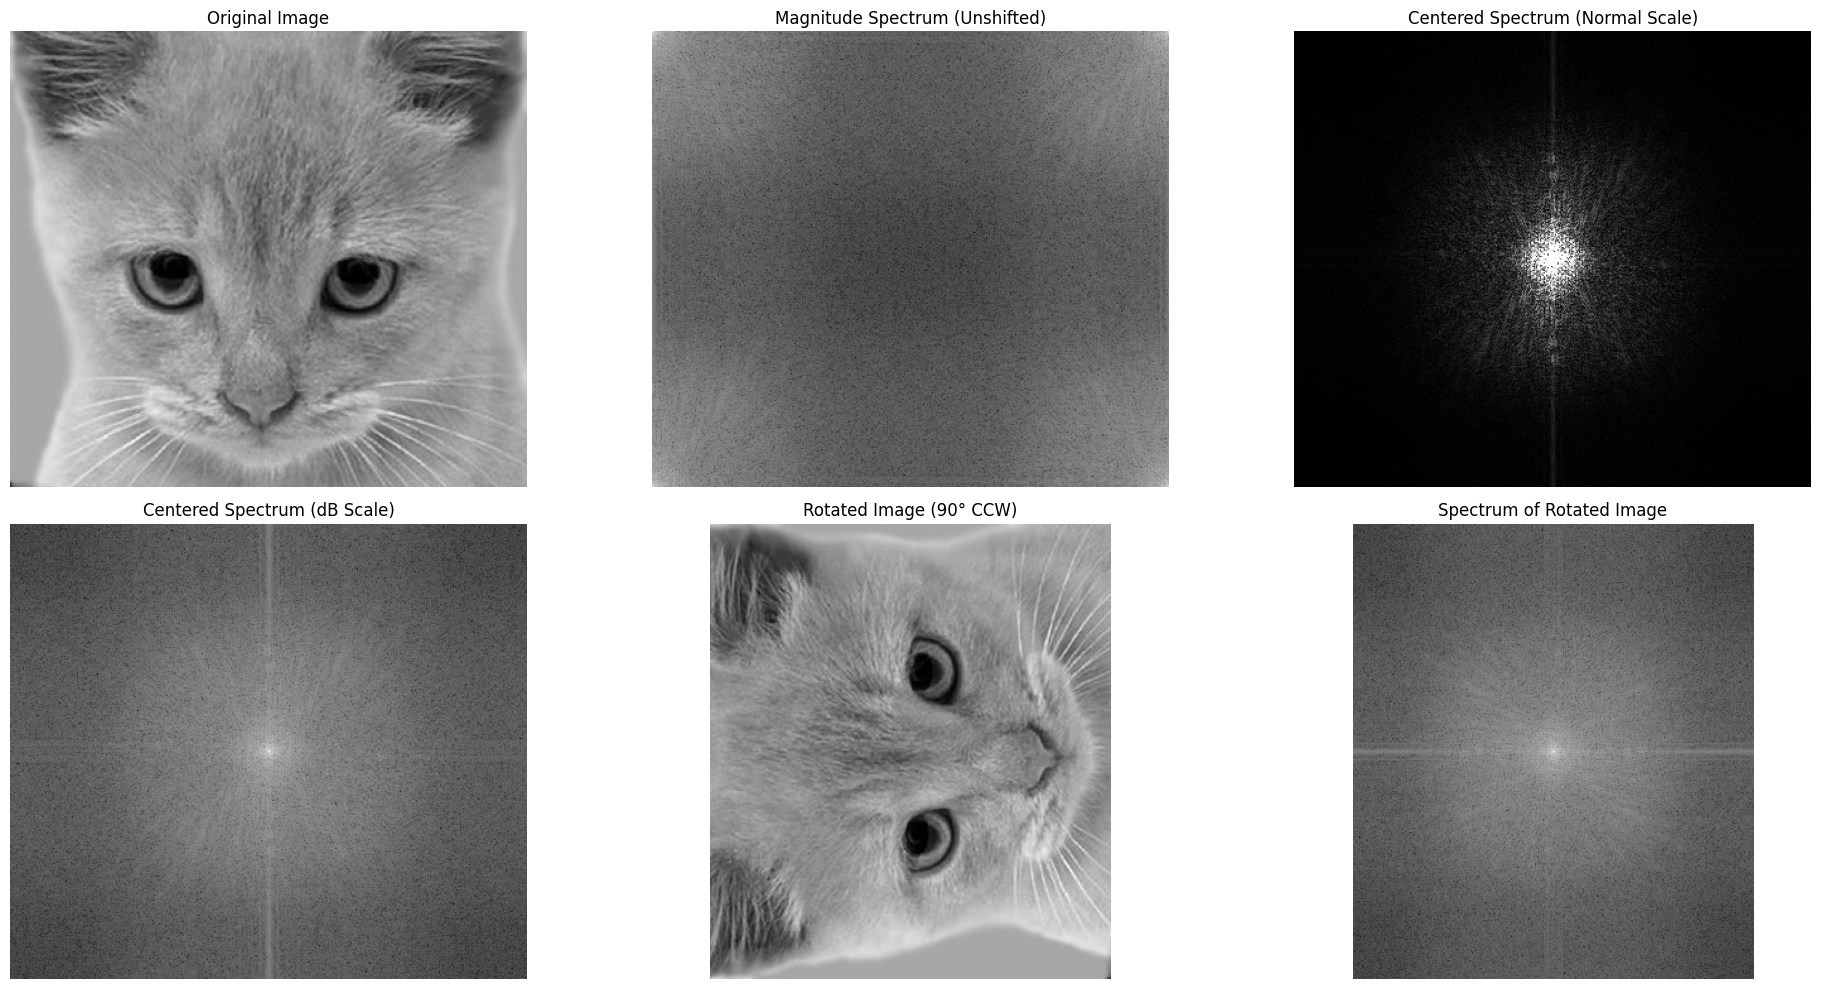

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img1_path = r"C:\Users\acer\Downloads\EE200_practical_programming\EE200_practical_programming\cat_gray.jpg"
img2_path = r"C:\Users\acer\Downloads\EE200_practical_programming\EE200_practical_programming\dog_gray.jpg"
# Load the input image and convert to grayscale
# Make sure 'einstein.jpg' is in the same directory or provide the full path
try:
    img = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError
except FileNotFoundError:
    print("Error: 'cat_gray.jpg' not found. Please provide a valid image path.")
    # As a fallback, create a dummy image for the script to run
    img = np.random.randint(0, 256, (256, 256), dtype=np.uint8)
    print("Using a random dummy image for demonstration.")


# --- Part 1: Calculate and Plot the 2D Fourier Transform ---

# 1. Calculate the 2D DFT
# The result will be a complex array.
f_transform = np.fft.fft2(img)

# 2. Calculate the magnitude spectrum (for visualization)
# np.abs() computes the magnitude of the complex numbers
magnitude_spectrum_uncentered = np.abs(f_transform)

# 3. Shift the zero-frequency component to the center of the spectrum
# This is crucial for intuitive visualization.
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum_centered = np.abs(f_transform_shifted)

# 4. Calculate the spectrum in dB scale for better visualization
# Add a small constant to avoid log(0) errors
magnitude_spectrum_db = 20 * np.log10(magnitude_spectrum_centered + 1)


# --- Plotting the results ---
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
# We use log scale here too, as unscaled magnitudes are hard to see
plt.imshow(np.log10(magnitude_spectrum_uncentered + 1), cmap='gray')
plt.title('Magnitude Spectrum (Unshifted)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(magnitude_spectrum_centered, cmap='gray', norm=plt.Normalize(vmin=0, vmax=50000))
plt.title('Centered Spectrum (Normal Scale)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(magnitude_spectrum_db, cmap='gray')
plt.title('Centered Spectrum (dB Scale)')
plt.axis('off')


# --- Part 2: Rotate the image and compare spectra ---

# Rotate the input image 90 degrees anti-clockwise
img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Calculate the DFT of the rotated image
f_transform_rotated = np.fft.fft2(img_rotated)
f_transform_rotated_shifted = np.fft.fftshift(f_transform_rotated)
magnitude_spectrum_rotated_centered = 20 * np.log10(np.abs(f_transform_rotated_shifted) + 1)

plt.subplot(2, 3, 5)
plt.imshow(img_rotated, cmap='gray')
plt.title('Rotated Image (90° CCW)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(magnitude_spectrum_rotated_centered, cmap='gray')
plt.title('Spectrum of Rotated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_9248\131310997.py:77: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.93])
C:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


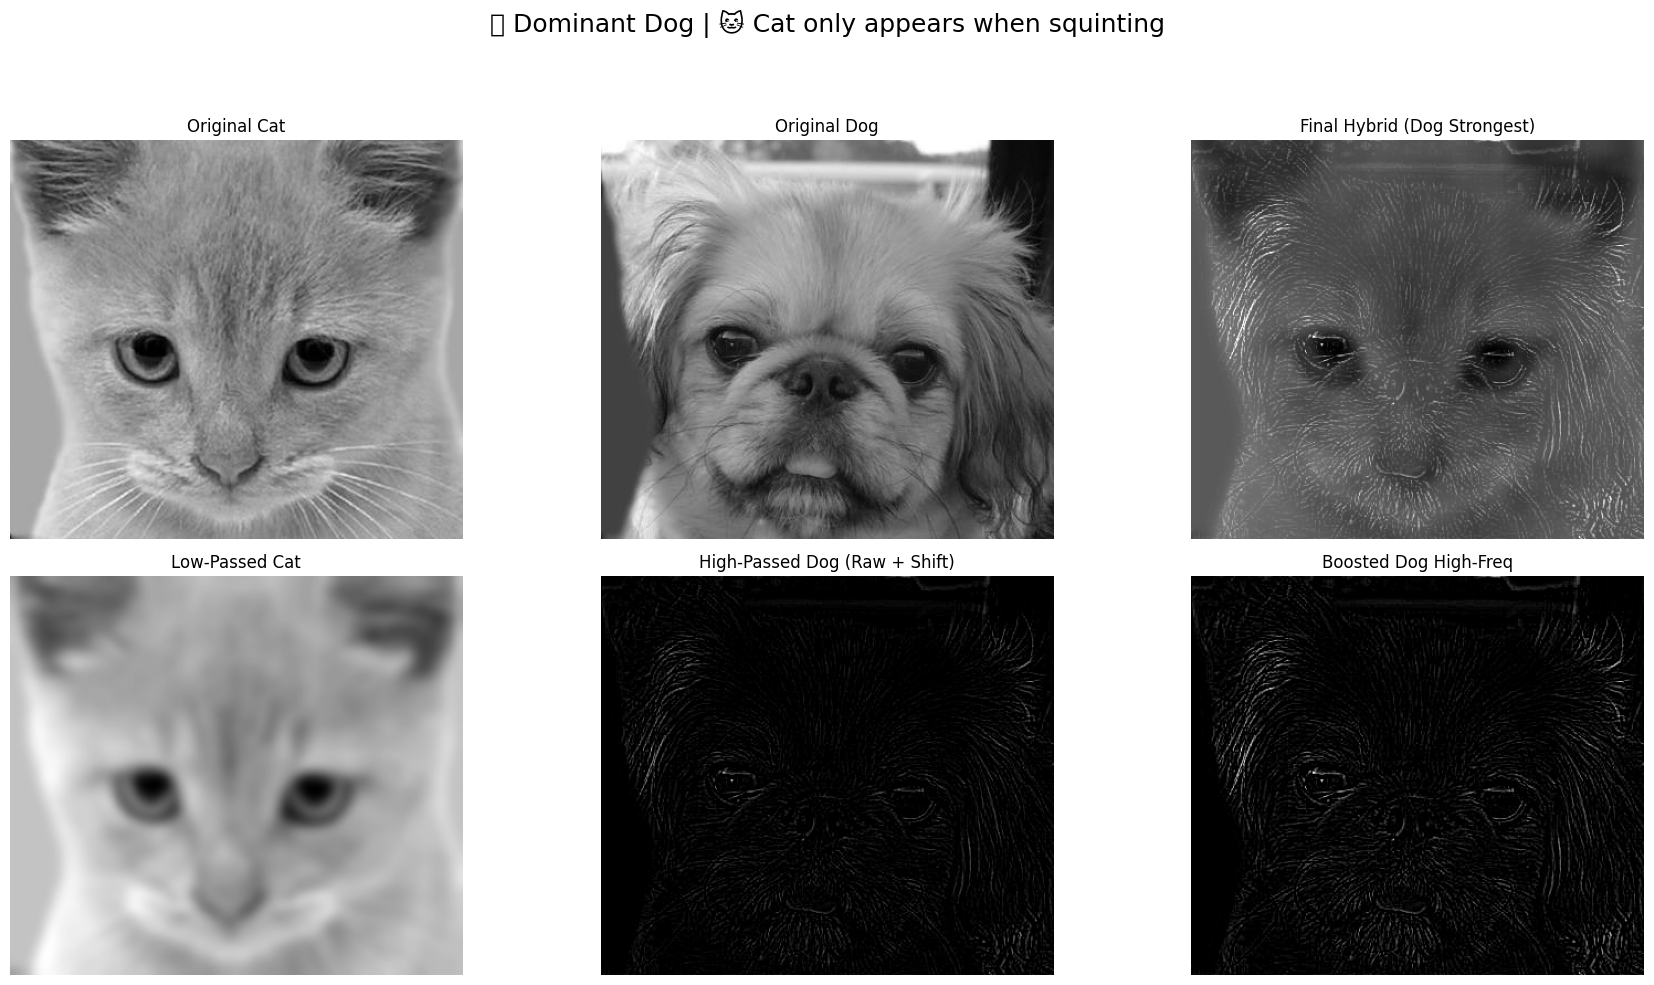

✅ Image saved as 'hybrid_dog_max_visible.jpg'.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_max_dog_hybrid(img1_path, img2_path, sigma_low=5, sigma_high=1.5, a=0.45, b=0.95):
    """
    Creates a hybrid image where dog is dominant (very visible), cat appears faintly when squinting.
    """
    cat = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    dog = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    if cat is None or dog is None:
        raise FileNotFoundError("One or both input images not found.")

    # Resize dog to match cat size
    dog = cv2.resize(dog, (cat.shape[1], cat.shape[0]))

    # Apply low-pass filter to cat
    cat_low = cv2.GaussianBlur(cat, (0, 0), sigmaX=sigma_low)

    # High-pass dog = dog - blur(dog)
    dog_blur = cv2.GaussianBlur(dog, (0, 0), sigmaX=sigma_high)
    dog_high = cv2.subtract(dog, dog_blur)

    # Boost high frequencies of dog
    dog_high_boosted = cv2.convertScaleAbs(dog_high, alpha=3.5, beta=50)

    # Combine both
    hybrid_float = a * cat_low.astype(np.float32) + b * dog_high_boosted.astype(np.float32)
    hybrid = np.clip(hybrid_float, 0, 255).astype(np.uint8)

    return cat, dog, cat_low, dog_high, dog_high_boosted, hybrid

# === Run and Display ===
try:
    img1_path = r"C:\Users\acer\Downloads\EE200_practical_programming\EE200_practical_programming\cat_gray.jpg"
    img2_path = r"C:\Users\acer\Downloads\EE200_practical_programming\EE200_practical_programming\dog_gray.jpg"

    cat, dog, cat_low, dog_high, dog_high_boosted, hybrid = create_max_dog_hybrid(
        img1_path, img2_path, sigma_low=5, sigma_high=1.5, a=0.45, b=0.95
    )

    # Plot the results
    plt.figure(figsize=(18, 10))
    plt.suptitle("🟢 Dominant Dog | 🐱 Cat only appears when squinting", fontsize=18)

    plt.subplot(2, 3, 1)
    plt.imshow(cat, cmap='gray')
    plt.title("Original Cat")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(dog, cmap='gray')
    plt.title("Original Dog")
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(hybrid, cmap='gray')
    plt.title("Final Hybrid (Dog Strongest)")
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(cat_low, cmap='gray')
    plt.title("Low-Passed Cat")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(dog_high + 127, cmap='gray')
    plt.title("High-Passed Dog (Raw + Shift)")
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(dog_high_boosted, cmap='gray')
    plt.title("Boosted Dog High-Freq")
    plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

    cv2.imwrite("hybrid_dog_max_visible.jpg", hybrid)
    print("✅ Image saved as 'hybrid_dog_max_visible.jpg'.")

except Exception as e:
    print(f"❌ Error: {e}")
